## CV2 image augmentation
- https://chatbotslife.com/german-sign-classification-using-deep-learning-neural-networks-98-8-solution-d05656bf51ad
- https://github.com/vxy10/p2-TrafficSigns
- [Brightness Augmentation]( https://medium.com/@vivek.yadav/improved-performance-of-deep-learning-neural-network-models-on-traffic-sign-classification-using-6355346da2dc)

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import matplotlib.image as mpimg

In [2]:
import image_process

(-0.5, 406.5, 355.5, -0.5)

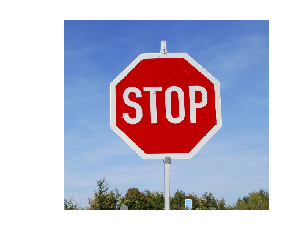

In [3]:
image = mpimg.imread('stopsign.png')
plt.imshow(image)
plt.axis('off')

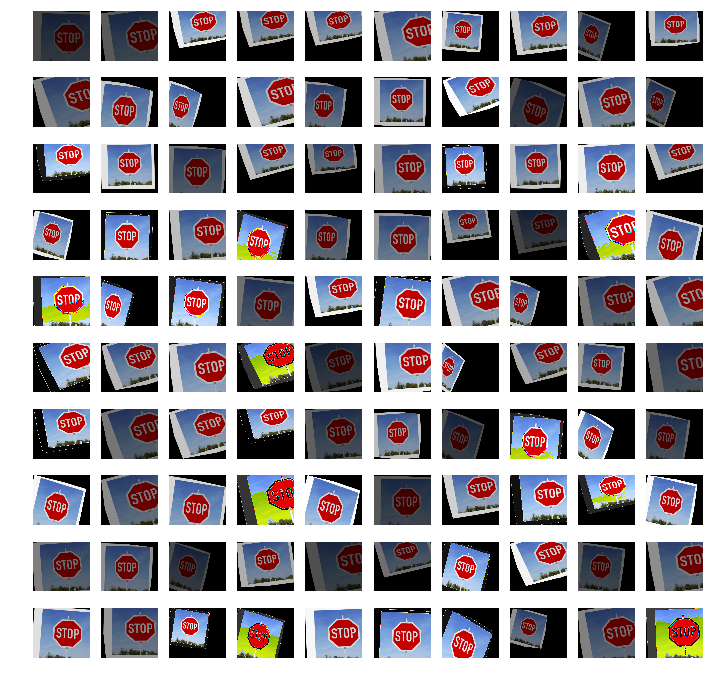

In [4]:
gs1 = gridspec.GridSpec(10, 10)
gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(12,12))
for i in range(100):
    ax1 = plt.subplot(gs1[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img = image_process.transform_image(image,20,10,5,brightness=1)

    plt.subplot(10,10,i+1)
    plt.imshow(img)
    plt.axis('off')

plt.show()

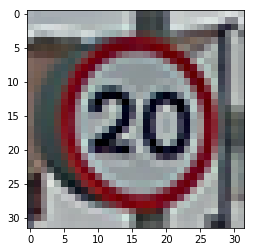

In [3]:
image2 = mpimg.imread('speed20.png')
plt.imshow(image2)

### Generate new images and save them

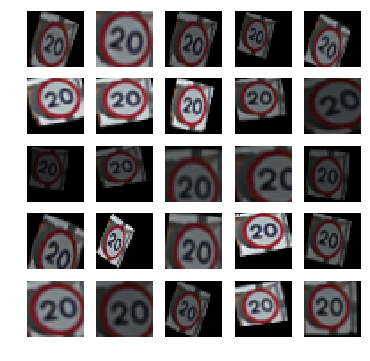

In [11]:
gs2 = gridspec.GridSpec(5, 5)
gs2.update(wspace=0.01, hspace=0.02) # set the spacing between axes.
plt.figure(figsize=(6,6))
for i in range(25):
    ax1 = plt.subplot(gs2[i])
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax1.set_aspect('equal')
    img2 = image_process.transform_image(image2,20,10,5,brightness=1)

    plt.subplot(5,5,i+1)
    plt.imshow(img2)
    plt.axis('off')
    
    mpimg.imsave('aug_imgs/{}.png'.format(i+1),img2)

plt.show()

### add generated images into pickle data

In [ ]:
img_resize = 32
def transform_image(image,ang_range,shear_range,trans_range):

    # Rotation

    ang_rot = np.random.uniform(ang_range)-ang_range/2
    rows,cols,ch = image.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)

    image = cv2.warpAffine(image,Rot_M,(cols,rows))
    image = cv2.warpAffine(image,Trans_M,(cols,rows))
    image = cv2.warpAffine(image,shear_M,(cols,rows))

    image = pre_process_image(image)

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)

    return image

def get_index_dict(y_train):
    # Returns indices of each label
    # Assumes that the labels are 0 to N-1
    dict_indices = {}
    ind_all = np.arange(len(y_train))

    for i in range(len(np.unique(y_train))):
        ind_i = ind_all[y_train == i]
        dict_indices[i] = ind_i
        #print(ind_i)
    return dict_indices

def gen_transformed_data(X_train,y_train,N_classes,n_each,ang_range,shear_range,trans_range,randomize_Var):

   dict_indices = get_index_dict(y_train)
   n_class = len(np.unique(y_train))
   X_arr = []
   Y_arr = []
   for i in range(n_class):
       len_i = len(dict_indices[i])
       ind_rand = np.random.randint(0,len_i,n_each)
       ind_dict_class  = dict_indices[i]

       for i_n in range(n_each):
           img_trf = transform_image(X_train[ind_dict_class[ind_rand[i_n]]],
                                     ang_range,shear_range,trans_range)
           X_arr.append(img_trf)
           Y_arr.append(i)

   X_arr = np.array(X_arr,dtype = np.float32())
   Y_arr = np.array(Y_arr,dtype = np.float32())

   if (randomize_Var == 1):
       len_arr = np.arange(len(Y_arr))
       np.random.shuffle(len_arr)
       X_arr[len_arr] = X_arr
       Y_arr[len_arr] = Y_arr

   labels_arr = OHE_labels(Y_arr,43)

   return X_arr,Y_arr,labels_arr